from google.colab import drive
drive.mount('/content/drive')

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)


## Loading the dataset

In [3]:
df = pd.read_csv(r"C:\Users\harsh\ML Assign\Data Sets\MLK\diabetes.csv")

In [4]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


# EDA

In [5]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

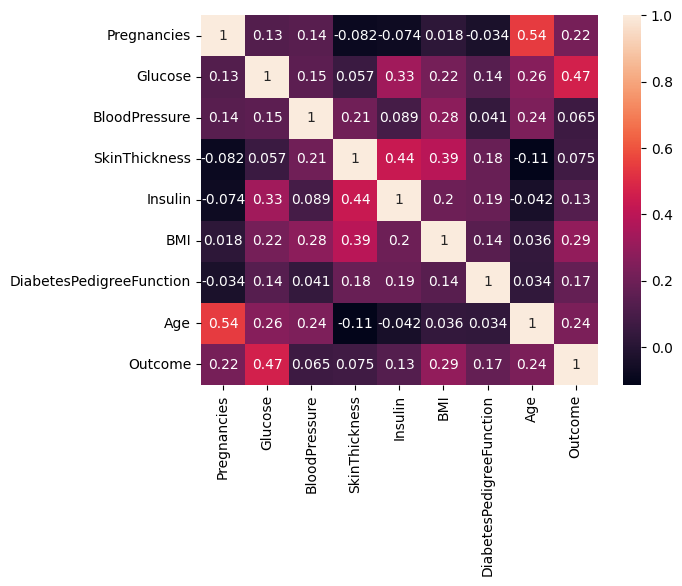

In [8]:
sns.heatmap(df.corr(), annot=True)

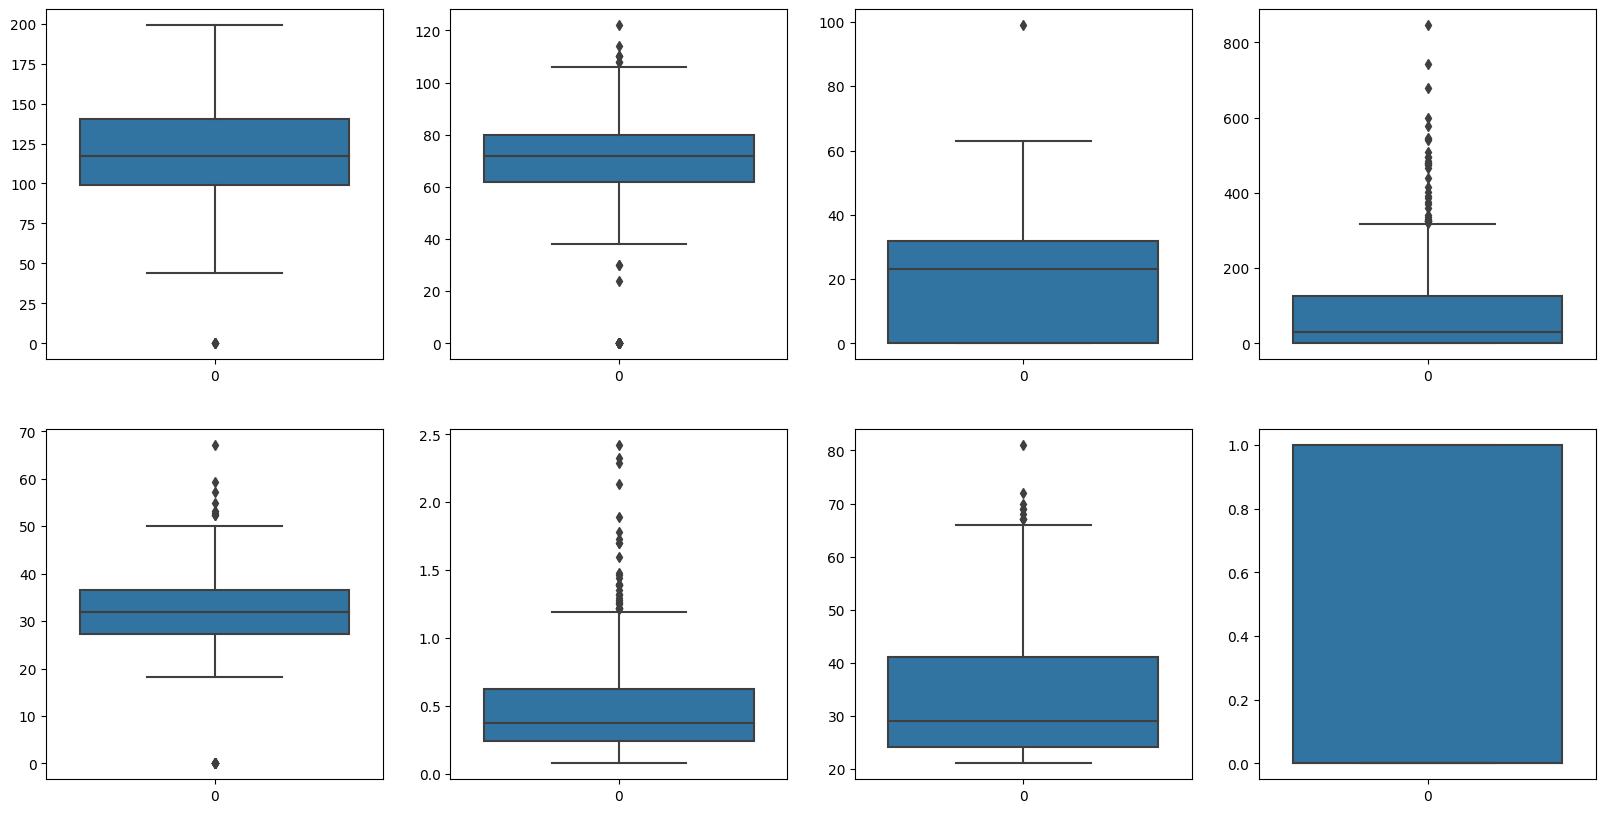

In [9]:
# Plotting the boxplot for the outliers
plt.figure(figsize=(20, 10))
for i in range(1, 9):
    plt.subplot(2, 4, i)
    sns.boxplot(df.iloc[:, i])

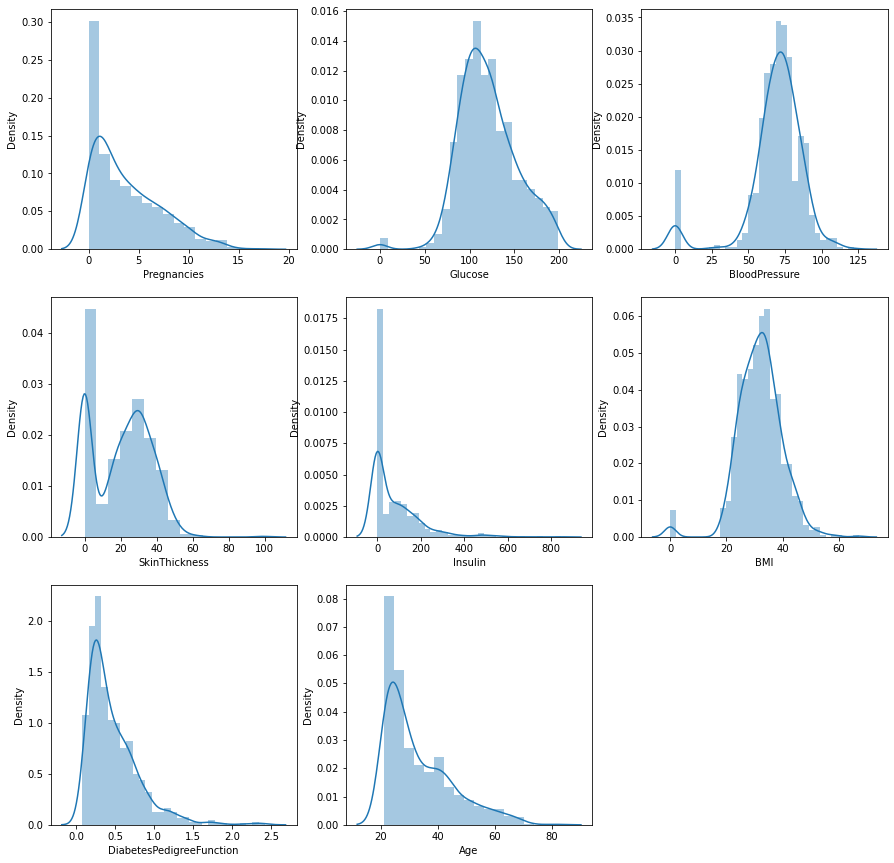

In [16]:
# Plotting the distribution of each feature
plt.figure(figsize=(15, 15))
for i in range(1, 9):
    plt.subplot(3, 3, i)
    sns.distplot(df.iloc[:, i - 1], kde=True)

In [10]:
# Dropping the outliers
df = df[
    (df["Glucose"] < 200)
    & (df["BloodPressure"] < 100)
    & (df["SkinThickness"] < 100)
    & (df["Insulin"] < 800)
    & (df["BMI"] < 60)
]

In [11]:
# Dropping the columns which are not required
df.drop(["SkinThickness", "BloodPressure"], axis=1, inplace=True)

In [12]:
df.skew()


Pregnancies                 0.91
Glucose                     0.17
Insulin                     2.10
BMI                        -0.60
DiabetesPedigreeFunction    1.92
Age                         1.17
Outcome                     0.66
dtype: float64

In [13]:
df.head()


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.60,0.63,50,1
1,1,85,0,26.60,0.35,31,0
2,8,183,0,23.30,0.67,32,1
3,1,89,94,28.10,0.17,21,0
4,0,137,168,43.10,2.29,33,1


In [14]:
# Splitting the data into X and y
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [15]:
# Importing the ML Algorithms

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Importing metrics

from sklearn.metrics import (
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
)

In [16]:
# Splitting the data into train and test
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Scaling the data

sc = StandardScaler()

# Scaling Selected Features

SCX_train = sc.fit_transform(X_train)
SCX_test = sc.transform(X_test)


In [17]:
# Creating a model list with model name and models
model_list = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=150)),
    ("XGBoost", XGBClassifier(verbosity=0)),
    ("CatBoost", CatBoostClassifier(verbose=0)),
    ("SVM", SVC(kernel="linear")),
    ("GaussianNB", GaussianNB()),
    ("BernoulliNB", BernoulliNB()),
]


# Modeling with Original Data without Scaling

In [18]:
model_dict = {}
for name, model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_dict[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, y_pred),
        "Cross Val Score": cross_val_score(model, X_train, y_train, cv=5).mean(),
    }
    pass

# Creating a dataframe for the model metrics
model_metrics = pd.DataFrame(model_dict).T
model_metrics.sort_values(by=["ROC AUC Score", "Accuracy"], ascending=False) * 100

,Accuracy,Precision,F1 Score,ROC AUC Score,Cross Val Score
Logistic Regression,78.15,73.17,64.52,73.29,76.50
SVM,78.15,74.36,63.74,72.83,77.00
CatBoost,76.16,67.39,63.27,72.23,75.67
GaussianNB,76.16,68.18,62.50,71.78,76.50
Random Forest,75.50,65.96,62.63,71.73,75.00
Decision Tree,72.85,59.65,62.39,71.08,70.33
XGBoost,72.85,60.38,60.95,70.16,73.00
BernoulliNB,65.56,0.00,0.00,50.00,65.50


# Modeling With Original Scaled Data

In [26]:
model_dict1 = {}
for name, model in model_list:
    model.fit(SCX_train, y_train)
    y_pred = model.predict(SCX_test)
    model_dict1[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, y_pred),
        "Cross Val Score": cross_val_score(model, SCX_train, y_train, cv=5).mean(),
    }
    pass

# Creating a dataframe for the model metrics
model_metrics = pd.DataFrame(model_dict1).T
model_metrics.sort_values(
    by=["ROC AUC Score", "Accuracy"], ascending=False) * 100


,Accuracy,Precision,F1 Score,ROC AUC Score,Cross Val Score
Random Forest,78.15,70.21,66.67,74.66,76.00
Logistic Regression,78.81,73.81,65.96,74.25,76.33
SVM,78.15,74.36,63.74,72.83,77.00
CatBoost,76.16,67.39,63.27,72.23,75.50
GaussianNB,76.16,68.18,62.50,71.78,76.50
XGBoost,72.85,60.38,60.95,70.16,72.83
Decision Tree,72.19,58.93,61.11,70.11,69.67
BernoulliNB,69.54,56.25,54.00,65.36,73.67


In [27]:
df.Outcome.value_counts()


0    493
1    258
Name: Outcome, dtype: int64

# OverSampling Data Using SMOTE

In [28]:
# Oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
XR, yR = smote.fit_resample(X, y)

# Splitting the data into train and test

XR_train, XR_test, yR_train, yR_test = train_test_split(
    XR, yR, test_size=0.2, random_state=0
)

In [29]:
# Scaling the data
sc = MinMaxScaler()

# Scaling all features
SCXR_train = sc.fit_transform(XR_train)
SCXR_test = sc.transform(XR_test)


# Modeling using OverSampled Data with SMOTE

In [30]:
model_dict2 = {}
for name, model in model_list:
    model.fit(XR_train, yR_train)
    y_pred = model.predict(XR_test)
    model_dict2[name] = {
        "Accuracy": accuracy_score(yR_test, y_pred),
        "Precision": precision_score(yR_test, y_pred),
        "F1 Score": f1_score(yR_test, y_pred),
        "ROC AUC Score": roc_auc_score(yR_test, y_pred),
        "Cross Val Score": cross_val_score(model, XR_train, yR_train, cv=5).mean(),
    }
    pass

# Creating a dataframe for the model metrics
model_metrics = pd.DataFrame(model_dict2).T
model_metrics.sort_values(
    by=["ROC AUC Score", "Accuracy"], ascending=False) * 100


,Accuracy,Precision,F1 Score,ROC AUC Score,Cross Val Score
CatBoost,84.85,83.19,86.24,84.55,78.18
Random Forest,84.34,83.04,85.71,84.07,79.07
XGBoost,80.81,81.31,82.08,80.68,76.28
Logistic Regression,77.78,77.98,79.44,77.57,72.47
GaussianNB,77.27,78.85,78.47,77.22,71.58
SVM,77.27,77.78,78.87,77.10,73.10
Decision Tree,74.75,78.35,75.25,74.90,73.35
BernoulliNB,50.00,53.57,47.62,50.46,53.69


# Modeling with Oversampled Scaled Data

In [31]:
model_dict3 = {}
for name, model in model_list:
    model.fit(SCXR_train, yR_train)
    y_pred = model.predict(SCXR_test)
    model_dict3[name] = {
        "Accuracy": accuracy_score(yR_test, y_pred),
        "Precision": precision_score(yR_test, y_pred),
        "F1 Score": f1_score(yR_test, y_pred),
        "ROC AUC Score": roc_auc_score(yR_test, y_pred),
        "Cross Val Score": cross_val_score(model, SCXR_train, yR_train, cv=5).mean(),
    }
    pass

# Creating a dataframe for the model metrics
model_metrics = pd.DataFrame(model_dict3).T
model_metrics.sort_values(
    by=["ROC AUC Score", "Accuracy"], ascending=False) * 100


,Accuracy,Precision,F1 Score,ROC AUC Score,Cross Val Score
CatBoost,84.85,83.19,86.24,84.55,78.18
Random Forest,83.84,81.74,85.45,83.47,77.67
XGBoost,80.81,81.31,82.08,80.68,76.15
GaussianNB,77.27,78.85,78.47,77.22,71.58
Logistic Regression,77.27,77.78,78.87,77.10,72.35
SVM,76.26,76.85,77.93,76.08,72.34
Decision Tree,74.24,76.47,75.36,74.24,73.48
BernoulliNB,52.53,55.79,53.00,52.66,52.29
